In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [54]:
image_path = '../output_videos/player_12.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

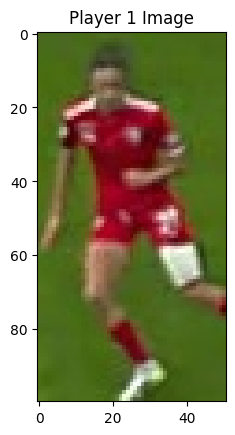

In [55]:
plt.imshow(image)
plt.title('Player 1 Image')
plt.show()

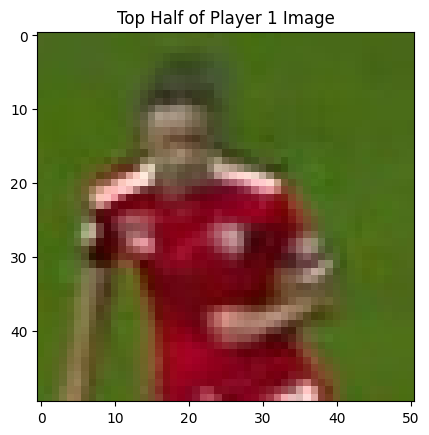

In [56]:
# Take top half of the image
top_half = image[:image.shape[0] // 2, :, :]
plt.imshow(top_half)
plt.title('Top Half of Player 1 Image')
plt.show()

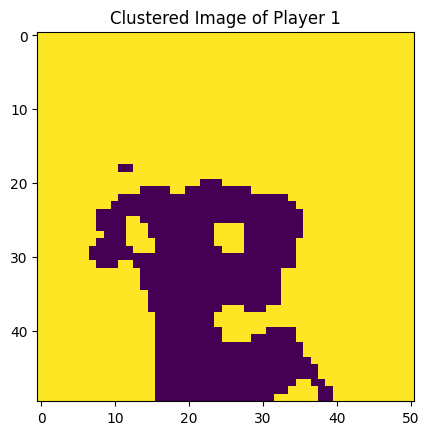

In [57]:
image_2d = top_half.reshape(-1, 3)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

labels = kmeans.labels_

clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

plt.imshow(clustered_image)
plt.title('Clustered Image of Player 1')
plt.show()

In [58]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1],
                  clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_clusters = max(set(corner_clusters), key=list(corner_clusters).count)
print("Corner clusters:", non_player_clusters)

Corner clusters: 1


In [59]:
player_clusters = 1 - non_player_clusters
print("Player clusters:", player_clusters)

Player clusters: 0


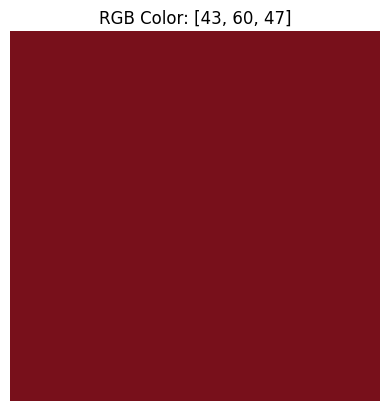

In [60]:
color = np.array(kmeans.cluster_centers_[player_clusters], dtype=np.uint8).reshape(1, 1, 3)
plt.imshow(color)
plt.title('RGB Color: [43, 60, 47]')
plt.axis('off')
plt.show()

Players from Damaiense are more easily detected as a more red color, than the other players